In [2]:
import pandas as pd
import numpy as np
from invertiblewavelets import Transform, LinearFilterBank, DyadicFilterBank
import matplotlib.pyplot as plt
from invertiblewavelets import *
import time

#### Load Example Data from Swarm A Spacecraft Magnetometer

In [15]:
data = np.load("data.npy")                  # Units in nanoTesla
sample_rate = 50.0                          # 50 Hz sampling rate
num_samples = data.shape[-1]                # 5000 samples
t = np.arange(num_samples) / sample_rate    # time array


#### Dyadic Scale Set

In [9]:
# -------------------------------------------------------------------
# filter-length ➜ RMSE
# -------------------------------------------------------------------
def rmse_for_Lh(Lh, sample_rate, data):
    fb = DyadicFilterBank(
        wavelet=Morlet(),
        fs=sample_rate,
        N=Lh,
        real=True,
        dj=1/8,
        s_max=4,
    )
    tr    = Transform(data=data, fs=sample_rate, filterbank=fb)
    recon = tr.inverse(tr.forward(data, mode='same'))

    margin = 1000
    err    = recon[margin:-margin] - data[margin:-margin]
    return np.sqrt(np.mean(err**2))


# -------------------------------------------------------------------
# main: parallel sweep with a *responsive* bar
# -------------------------------------------------------------------
# --- analysis target ---------------------------------------------
low, high = 1000, 10000          # inclusive start, exclusive stop
rng       = np.random.default_rng(42)   # seed for reproducibility

# keep stepping by 1‒10 until we’d exceed `high`
steps = rng.integers(10, 100, size=high-low)     # overshoot then trim
Lhs   = np.cumsum(np.insert(steps, 0, low))    # start at 1000
Lhs   = Lhs[Lhs < high]
rmses  = []


# --- sweep (single process, live plot) ---------------------------
for Lh in Lhs:
    rmse = rmse_for_Lh(Lh, sample_rate=sample_rate, data=data)
    rmses.append(rmse)
    print(f"RMSE for Lh={Lh}: {rmse:.2f}")


RMSE for Lh=1000: 3.15
RMSE for Lh=1018: 1.95
RMSE for Lh=1097: 0.76
RMSE for Lh=1165: 0.66
RMSE for Lh=1214: 0.73
RMSE for Lh=1262: 0.73
RMSE for Lh=1349: 0.34
RMSE for Lh=1366: 0.30
RMSE for Lh=1438: 0.20
RMSE for Lh=1466: 0.12
RMSE for Lh=1484: 0.09
RMSE for Lh=1541: 0.09
RMSE for Lh=1638: 0.18
RMSE for Lh=1714: 0.21
RMSE for Lh=1792: 0.19
RMSE for Lh=1866: 0.15
RMSE for Lh=1946: 0.18
RMSE for Lh=2002: 0.19
RMSE for Lh=2023: 0.21
RMSE for Lh=2108: 0.10
RMSE for Lh=2158: 0.12
RMSE for Lh=2213: 0.12
RMSE for Lh=2256: 0.08
RMSE for Lh=2282: 0.08
RMSE for Lh=2375: 0.06
RMSE for Lh=2455: 0.05
RMSE for Lh=2522: 0.05
RMSE for Lh=2568: 0.06
RMSE for Lh=2652: 0.08
RMSE for Lh=2711: 0.09
RMSE for Lh=2760: 0.10
RMSE for Lh=2810: 0.10
RMSE for Lh=2840: 0.11
RMSE for Lh=2858: 0.11
RMSE for Lh=2917: 0.11
RMSE for Lh=3006: 0.11
RMSE for Lh=3021: 0.11
RMSE for Lh=3108: 0.10
RMSE for Lh=3192: 0.10
RMSE for Lh=3226: 0.09
RMSE for Lh=3292: 0.09
RMSE for Lh=3316: 0.09
RMSE for Lh=3394: 0.08
RMSE for Lh

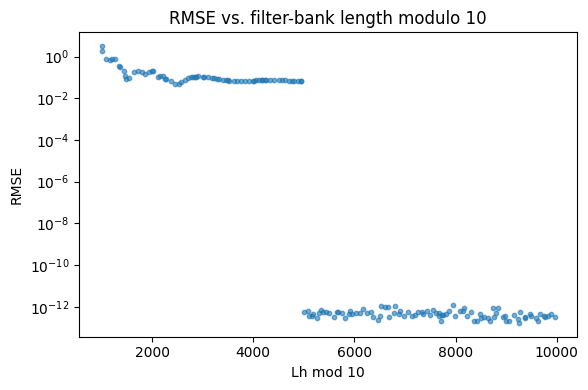

In [ ]:
# ── 1) strip-plot (all points with a tiny horizontal jitter) ──────────
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    Lhs,
    rmses,
    s     = 10,
    alpha = 0.6,
)

ax.set_xlabel("Filter bank length (Lh)")
ax.set_ylabel("RMSE")
ax.set_yscale("log")
ax.set_title("RMSE vs. filter-bank length modulo 10")
plt.tight_layout()
plt.show()

#### Transform


In [12]:
# -------------------------------------------------------------------
# filter-length ➜ RMSE
# -------------------------------------------------------------------
def rmse_for_Lh(Lh, sample_rate, data):
    fb = LinearFilterBank(
        wavelet=Morlet(),
        fs=sample_rate,
        N=Lh,
        real=True,
        b=4,
    )
    tr    = Transform(data=data, fs=sample_rate, filterbank=fb)
    recon = tr.inverse(tr.forward(data, mode='same'))

    margin = 1000
    err    = recon[margin:-margin] - data[margin:-margin]
    return np.sqrt(np.mean(err**2))


# -------------------------------------------------------------------
# main: parallel sweep with a *responsive* bar
# -------------------------------------------------------------------
# --- analysis target ---------------------------------------------
low, high = 1000, 10000          # inclusive start, exclusive stop
rng       = np.random.default_rng(42)   # seed for reproducibility

# keep stepping by 1‒10 until we’d exceed `high`
steps = rng.integers(10, 100, size=high-low)     # overshoot then trim
Lhs   = np.cumsum(np.insert(steps, 0, low))    # start at 1000
Lhs   = Lhs[Lhs < high]
rmses  = []


# --- sweep (single process, live plot) ---------------------------
for Lh in Lhs:
    rmse = rmse_for_Lh(Lh, sample_rate=sample_rate, data=data)
    rmses.append(rmse)
    print(f"RMSE for Lh={Lh}: {rmse:.2f}")


RMSE for Lh=1000: 0.82
RMSE for Lh=1018: 0.54
RMSE for Lh=1097: 14.31
RMSE for Lh=1165: 15.93
RMSE for Lh=1214: 17.29
RMSE for Lh=1262: 18.79
RMSE for Lh=1349: 3.76
RMSE for Lh=1366: 3.75
RMSE for Lh=1438: 6.66
RMSE for Lh=1466: 7.85
RMSE for Lh=1484: 8.43
RMSE for Lh=1541: 9.69
RMSE for Lh=1638: 10.53
RMSE for Lh=1714: 10.66
RMSE for Lh=1792: 10.66
RMSE for Lh=1866: 10.83
RMSE for Lh=1946: 11.48
RMSE for Lh=2002: 12.35
RMSE for Lh=2023: 12.79
RMSE for Lh=2108: 22.22
RMSE for Lh=2158: 11.94
RMSE for Lh=2213: 14.22
RMSE for Lh=2256: 15.58
RMSE for Lh=2282: 16.32
RMSE for Lh=2375: 18.45
RMSE for Lh=2455: 19.81
RMSE for Lh=2522: 20.69
RMSE for Lh=2568: 21.18
RMSE for Lh=2652: 21.90
RMSE for Lh=2711: 22.28
RMSE for Lh=2760: 22.52
RMSE for Lh=2810: 22.72
RMSE for Lh=2840: 22.80
RMSE for Lh=2858: 22.85
RMSE for Lh=2917: 22.96
RMSE for Lh=3006: 23.03
RMSE for Lh=3021: 23.03
RMSE for Lh=3108: 22.98
RMSE for Lh=3192: 22.88
RMSE for Lh=3226: 22.83
RMSE for Lh=3292: 22.70
RMSE for Lh=3316: 22.65


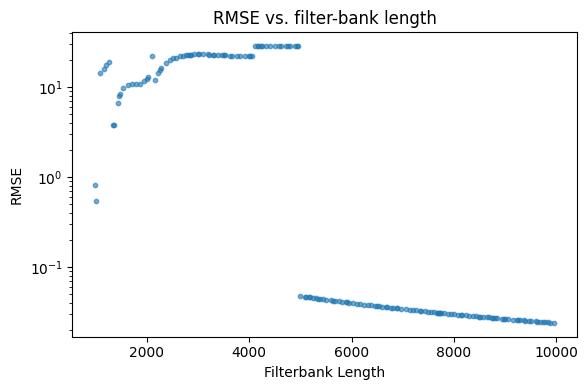

In [ ]:
# ── 1) strip-plot (all points with a tiny horizontal jitter) ──────────
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(
    Lhs,
    rmses,
    s     = 10,
    alpha = 0.6,
)

ax.set_xlabel("Filter bank length (Lh)")
ax.set_ylabel("RMSE")
ax.set_yscale("log")
ax.set_title("RMSE vs. filter-bank length")
plt.tight_layout()
plt.show()